<a href="https://colab.research.google.com/github/Hayko00077/AI_Projects/blob/main/ai_exam_hayk_vardazaryan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/task_ai21.csv')
print(df.shape)
print(df.columns)
df.describe()
df.info()
df.head(10)


(2000, 22)
Index(['Unnamed: 0', 'battery_power', 'clock_speed', 'dual_sim', 'four_g',
       'px_height', 'px_width', 'ram', 'talk_time', 'three_g', 'touch_screen',
       'wifi', 'price_range', 'bluetooth', 'front_camera', 'memory',
       'mobile_depth', 'mobile_weight', 'number_of_cores', 'camera_pixels',
       'screen_height', 'screen_width'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       2000 non-null   int64 
 1   battery_power    2000 non-null   int64 
 2   clock_speed      1892 non-null   object
 3   dual_sim         2000 non-null   int64 
 4   four_g           1890 non-null   object
 5   px_height        2000 non-null   int64 
 6   px_width         2000 non-null   int64 
 7   ram              2000 non-null   int64 
 8   talk_time        1893 non-null   object
 9   three_g          200

Unnamed: 0  battery_power clock_speed  dual_sim four_g  px_height  \
0           0            842         2.2         0    0.0         20   
1           1           1021         0.5         1    1.0        905   
2           2            563         0.5         1    1.0       1263   
3           3            615         2.5         0    0.0       1216   
4           4           1821         1.2         0    NaN       1208   
5           5           1859         0.5         1    0.0       1004   
6           6           1821         1.7         0    1.0        381   
7           7           1954         0.5         1    0.0        512   
8           8           1445         0.5         0    0.0        386   
9           9            509         0.6         1    1.0       1137   

   px_width   ram talk_time  three_g  ... price_range  bluetooth front_camera  \
0       756  2549      19.0        0  ...         0.0          0          1.0   
1      1988  2631       7.0        1  ...         1.0          1          0.0   
2      1716  2603       9.0        1  ...         1.0          1          2.0   
3      1786  2769      11.0        1  ...         1.0          1          0.0   
4      1212  1411      15.0        1  ...         0.0          1         13.0   
5      1654  1067      10.0        1  ...         0.0          0          3.0   
6      1018  3220      18.0        1  ...         1.0          0          4.0   
7      1149   700       5.0        1  ...         0.0          0          0.0   
8       836  1099      20.0        1  ...         0.0          1          0.0   
9      1224   513      12.0        1  ...         0.0          1          2.0   

   memory mobile_depth mobile_weight number_of_cores  camera_pixels  \
0     7.0          0.6           188               2            2.0   
1    53.0          0.7           136               3            6.0   
2    41.0          0.9           145               5            6.0   
3    10.0          0.8           131               6            9.0   
4    44.0            @           141               2           14.0   
5    22.0          0.7           164               1            7.0   
6    10.0          0.8           139               8           10.0   
7       _          0.8           187               4            0.0   
8    53.0          0.7           174               7           14.0   
9     9.0          0.1            93               5           15.0   

   screen_height screen_width  
0              9            _  
1             17          3.0  
2             11          2.0  
3             16          8.0  
4              8          2.0  
5             17          1.0  
6             13          NaN  
7             16          3.0  
8             17          1.0  
9             19         10.0  

[10 rows x 22 columns]

In [ ]:
print(df.isna().sum())
print(f"Number of duplicatdf {df.duplicated().sum()}")

Unnamed: 0           0
battery_power        0
clock_speed        108
dual_sim             0
four_g             110
px_height            0
px_width             0
ram                  0
talk_time          107
three_g              0
touch_screen       110
wifi                 0
price_range        108
bluetooth            0
front_camera       108
memory             105
mobile_depth       109
mobile_weight        0
number_of_cores      0
camera_pixels      102
screen_height        0
screen_width       106
dtype: int64
Number of duplicatdf 0


In [ ]:
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing Percentage': missing_percentage.values
}).sort_values('Missing Percentage', ascending=False)
print(" Missing Values Summary:")
print("-" * 30)
display(missing_df)

 Missing Values Summary:
------------------------------


Column  Missing Count  Missing Percentage
4            four_g            110                5.50
10     touch_screen            110                5.50
16     mobile_depth            109                5.45
14     front_camera            108                5.40
12      price_range            108                5.40
2       clock_speed            108                5.40
8         talk_time            107                5.35
21     screen_width            106                5.30
15           memory            105                5.25
19    camera_pixels            102                5.10
5         px_height              0                0.00
3          dual_sim              0                0.00
0        Unnamed: 0              0                0.00
1     battery_power              0                0.00
13        bluetooth              0                0.00
11             wifi              0                0.00
7               ram              0                0.00
9           three_g              0                0.00
6          px_width              0                0.00
17    mobile_weight              0                0.00
18  number_of_cores              0                0.00
20    screen_height              0                0.00

In [ ]:
df['four_g'].unique()

array(['0.0', '1.0', nan, '@', '??', '_', '#'], dtype=object)

In [ ]:
df['four_g'] = df['four_g'].replace(['@', '??', '_', '#'], np.nan)
df['four_g'].unique()

array(['0.0', '1.0', nan], dtype=object)

In [ ]:
df['touch_screen'].unique()

array(['0.0', '1.0', nan, '_', '??', '@', '#'], dtype=object)

In [ ]:
df['touch_screen'] = df['touch_screen'].replace(['@', '??', '_', '#'], np.nan)
df['touch_screen'].unique()

array(['0.0', '1.0', nan], dtype=object)

In [ ]:
df['price_range'].unique()

array(['0.0', '1.0', nan, '@', '#', '??', '_'], dtype=object)

In [ ]:
df['price_range'] = df['price_range'].replace(['@', '??', '_', '#'], np.nan)
df['price_range'].unique()

array(['0.0', '1.0', nan], dtype=object)

In [ ]:
df['talk_time'].unique()

array(['19.0', '7.0', '9.0', '11.0', '15.0', '10.0', '18.0', '5.0',
       '20.0', '12.0', '13.0', '2.0', '4.0', '3.0', nan, '16.0', '6.0',
       '14.0', '??', '_', '#', '8.0', '17.0', '@'], dtype=object)

In [ ]:
df['talk_time'] = df['talk_time'].replace(['@', '_', '#'], np.nan)
df['talk_time'].unique()

array(['19.0', '7.0', '9.0', '11.0', '15.0', '10.0', '18.0', '5.0',
       '20.0', '12.0', '13.0', '2.0', '4.0', '3.0', nan, '16.0', '6.0',
       '14.0', '??', '8.0', '17.0'], dtype=object)

In [ ]:
df['clock_speed'].unique()

array(['2.2', '0.5', '2.5', '1.2', '1.7', '0.6', '2.9', '2.8', '2.1',
       '1.0', '0.9', '1.1', '_', '1.4', '1.6', '2.7', '1.3', '2.3', nan,
       '1.8', '2.6', '3.0', '1.5', '1.9', '2.0', '2.4', '0.8', '0.7',
       '??', '@', '#'], dtype=object)

In [ ]:
df['clock_speed'] = df['clock_speed'].replace(['@', '??', '_', '#'], np.nan)
df['clock_speed'].unique()

array(['2.2', '0.5', '2.5', '1.2', '1.7', '0.6', '2.9', '2.8', '2.1',
       '1.0', '0.9', '1.1', nan, '1.4', '1.6', '2.7', '1.3', '2.3', '1.8',
       '2.6', '3.0', '1.5', '1.9', '2.0', '2.4', '0.8', '0.7'],
      dtype=object)

In [ ]:
df['front_camera'].unique()

array(['1.0', '0.0', '2.0', '13.0', '3.0', '4.0', '5.0', '7.0', '11.0',
       '12.0', '??', '16.0', '6.0', '15.0', '8.0', '@', '9.0', '#',
       '10.0', nan, '18.0', '17.0', '_', '14.0', '19.0'], dtype=object)

In [ ]:
df['front_camera'] = df['front_camera'].replace(['@', '??', '_', '#'], np.nan)
df['front_camera'].unique()

array(['1.0', '0.0', '2.0', '13.0', '3.0', '4.0', '5.0', '7.0', '11.0',
       '12.0', nan, '16.0', '6.0', '15.0', '8.0', '9.0', '10.0', '18.0',
       '17.0', '14.0', '19.0'], dtype=object)

In [ ]:
df['memory'].unique()

array(['7.0', '53.0', '41.0', '10.0', '44.0', '22.0', '_', '9.0', '33.0',
       '17.0', '52.0', '46.0', '13.0', '23.0', '49.0', '19.0', '39.0',
       '47.0', '38.0', '8.0', '57.0', '51.0', '21.0', '5.0', '60.0',
       '61.0', '6.0', '11.0', '50.0', '34.0', '20.0', '27.0', '42.0', nan,
       '64.0', '14.0', '63.0', '43.0', '16.0', '48.0', '12.0', '55.0',
       '36.0', '30.0', '45.0', '29.0', '58.0', '25.0', '3.0', '54.0',
       '15.0', '37.0', '31.0', '32.0', '4.0', '18.0', '40.0', '2.0', '#',
       '56.0', '26.0', '24.0', '59.0', '28.0', '@', '62.0', '??', '35.0'],
      dtype=object)

In [ ]:
df['memory'] = df['memory'].replace(['@', '_', '#'], np.nan)
df['memory'].unique()

array(['7.0', '53.0', '41.0', '10.0', '44.0', '22.0', nan, '9.0', '33.0',
       '17.0', '52.0', '46.0', '13.0', '23.0', '49.0', '19.0', '39.0',
       '47.0', '38.0', '8.0', '57.0', '51.0', '21.0', '5.0', '60.0',
       '61.0', '6.0', '11.0', '50.0', '34.0', '20.0', '27.0', '42.0',
       '64.0', '14.0', '63.0', '43.0', '16.0', '48.0', '12.0', '55.0',
       '36.0', '30.0', '45.0', '29.0', '58.0', '25.0', '3.0', '54.0',
       '15.0', '37.0', '31.0', '32.0', '4.0', '18.0', '40.0', '2.0',
       '56.0', '26.0', '24.0', '59.0', '28.0', '62.0', '??', '35.0'],
      dtype=object)

In [ ]:
df['mobile_depth'].unique()

array(['0.6', '0.7', '0.9', '0.8', '@', '0.1', '0.5', '1.0', '0.3', '0.4',
       '0.2', '??', nan, '_', '#'], dtype=object)

In [ ]:
df['mobile_depth'] = df['mobile_depth'].replace(['@', '??', '_', '#'], np.nan)
df['mobile_depth'].unique()

array(['0.6', '0.7', '0.9', '0.8', nan, '0.1', '0.5', '1.0', '0.3', '0.4',
       '0.2'], dtype=object)

In [ ]:
df['camera_pixels'].unique()

array(['2.0', '6.0', '9.0', '14.0', '7.0', '10.0', '0.0', '15.0', '1.0',
       nan, '17.0', '11.0', '16.0', '4.0', '18.0', '20.0', '13.0', '3.0',
       '19.0', '5.0', '8.0', '12.0', '#', '_', '@', '??'], dtype=object)

In [ ]:
df['camera_pixels'] = df['camera_pixels'].replace(['@', '??', '_', '#'], np.nan)
df['camera_pixels'].unique()

array(['2.0', '6.0', '9.0', '14.0', '7.0', '10.0', '0.0', '15.0', '1.0',
       nan, '17.0', '11.0', '16.0', '4.0', '18.0', '20.0', '13.0', '3.0',
       '19.0', '5.0', '8.0', '12.0'], dtype=object)

In [ ]:
df['screen_width'].unique()

array(['_', '3.0', '2.0', '8.0', '1.0', nan, '10.0', '9.0', '0.0', '15.0',
       '13.0', '5.0', '7.0', '11.0', '4.0', '??', '12.0', '#', '6.0',
       '17.0', '14.0', '16.0', '@', '18.0'], dtype=object)

In [ ]:
df['screen_width'] = df['screen_width'].replace(['@', '??', '_', '#'], np.nan)
df['screen_width'].unique()

array([nan, '3.0', '2.0', '8.0', '1.0', '10.0', '9.0', '0.0', '15.0',
       '13.0', '5.0', '7.0', '11.0', '4.0', '12.0', '6.0', '17.0', '14.0',
       '16.0', '18.0'], dtype=object)

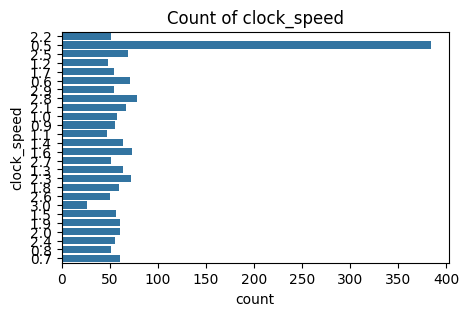

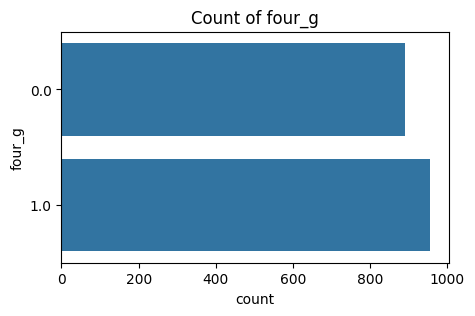

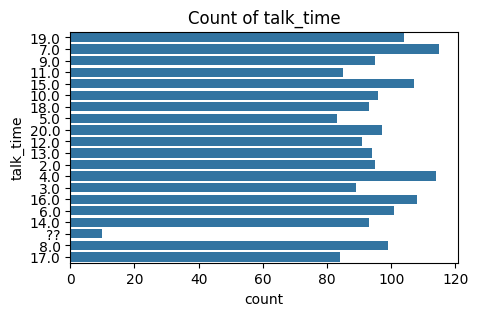

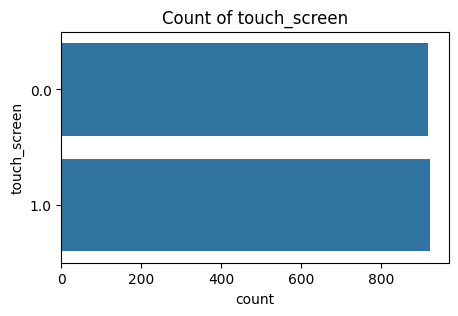

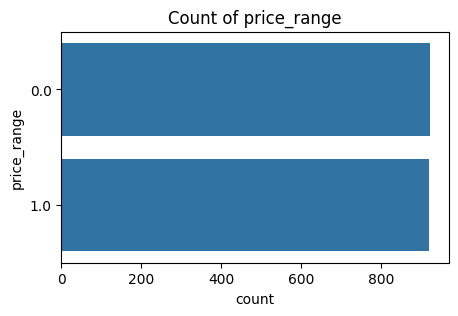

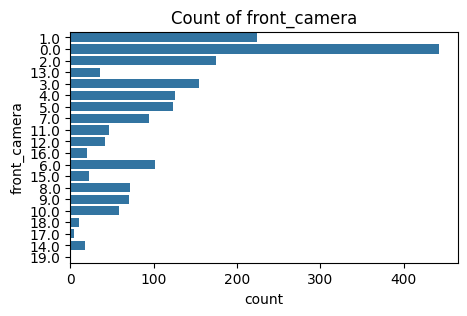

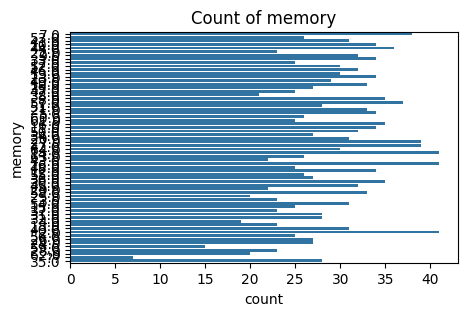

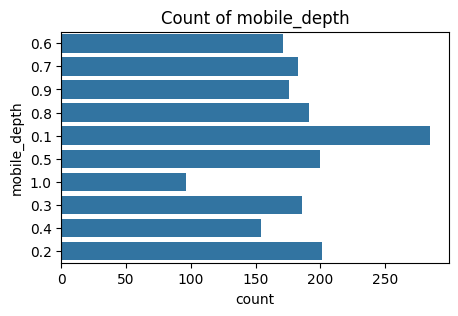

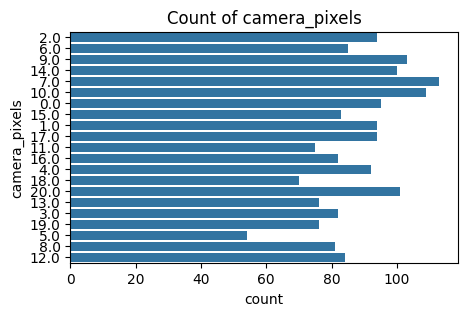

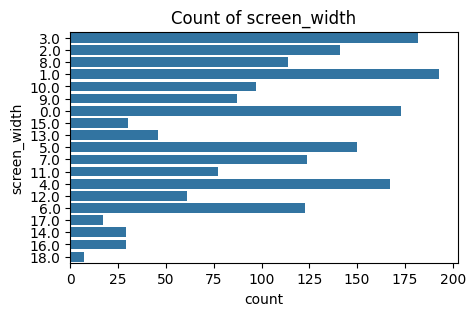

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(y=df[col])
    plt.title(f'Count of {col}')
    plt.show()


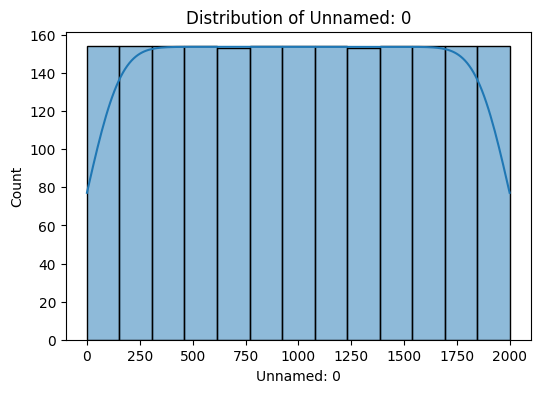

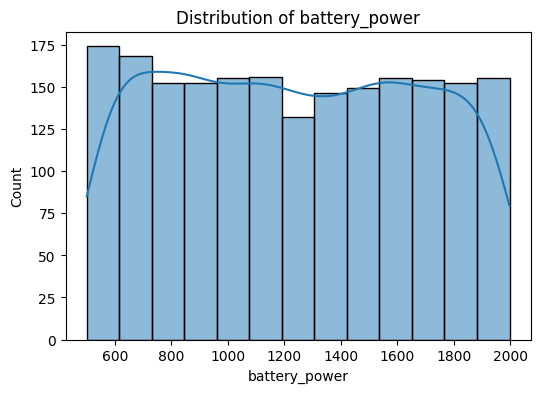

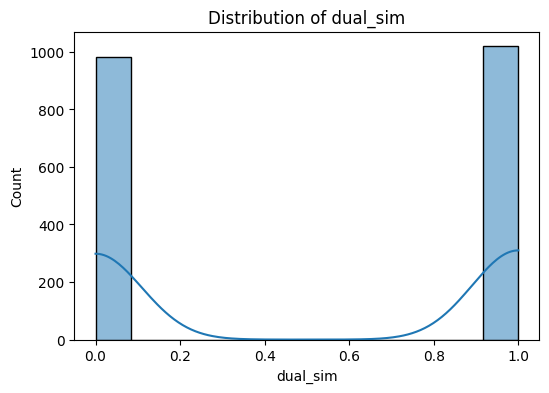

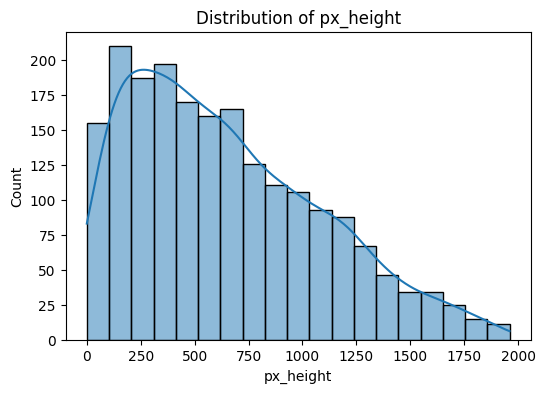

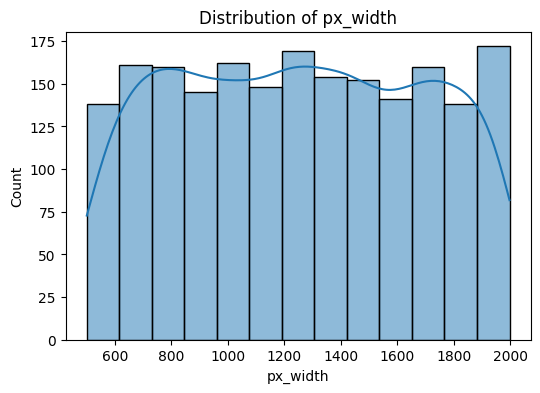

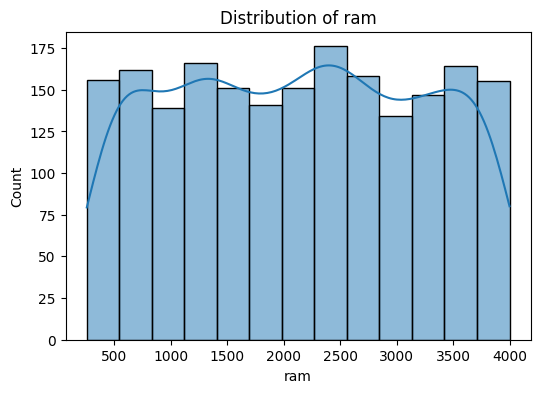

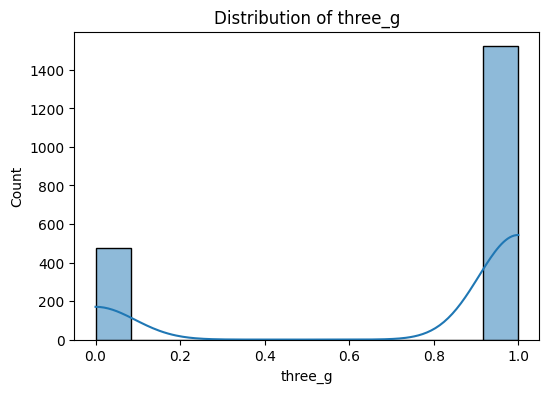

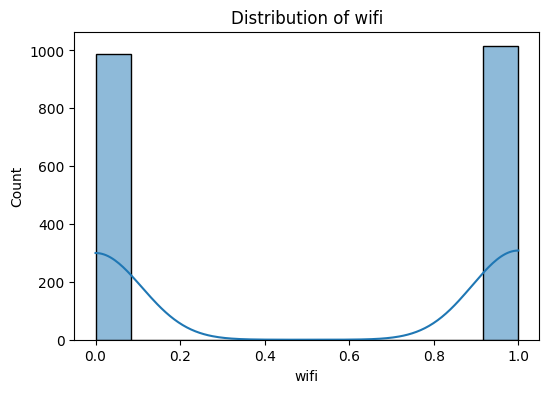

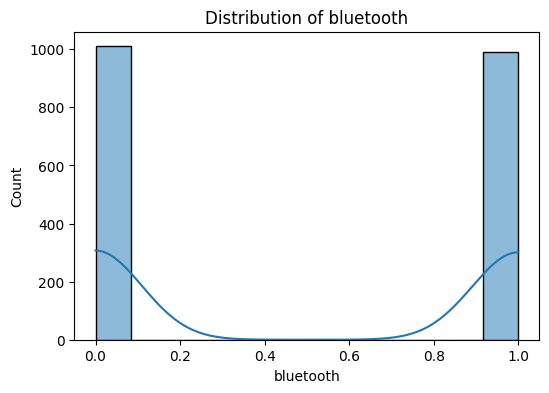

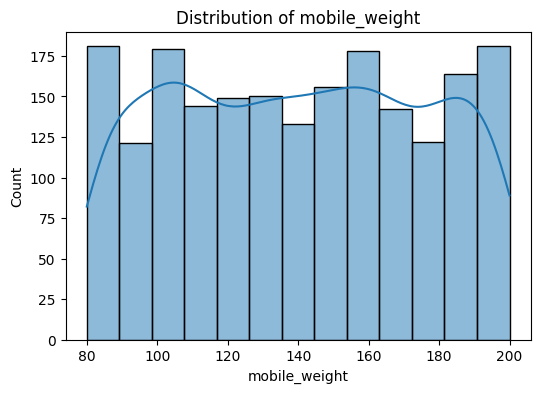

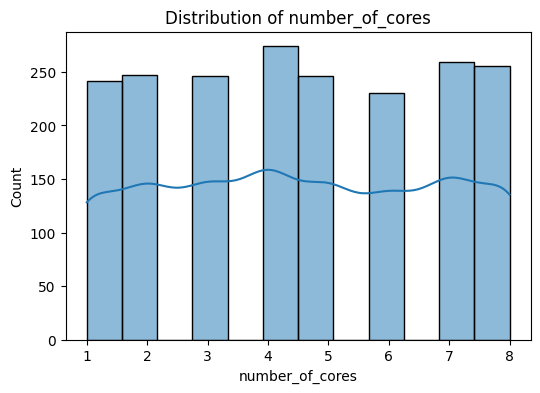

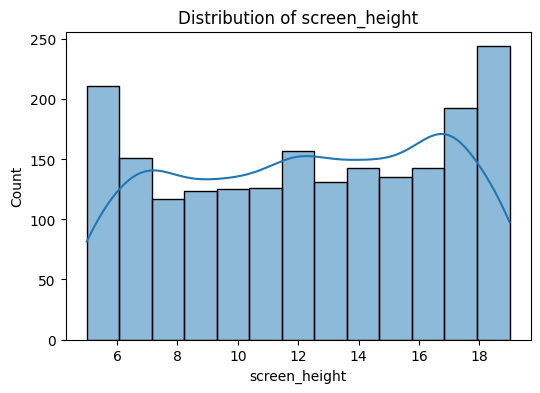

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

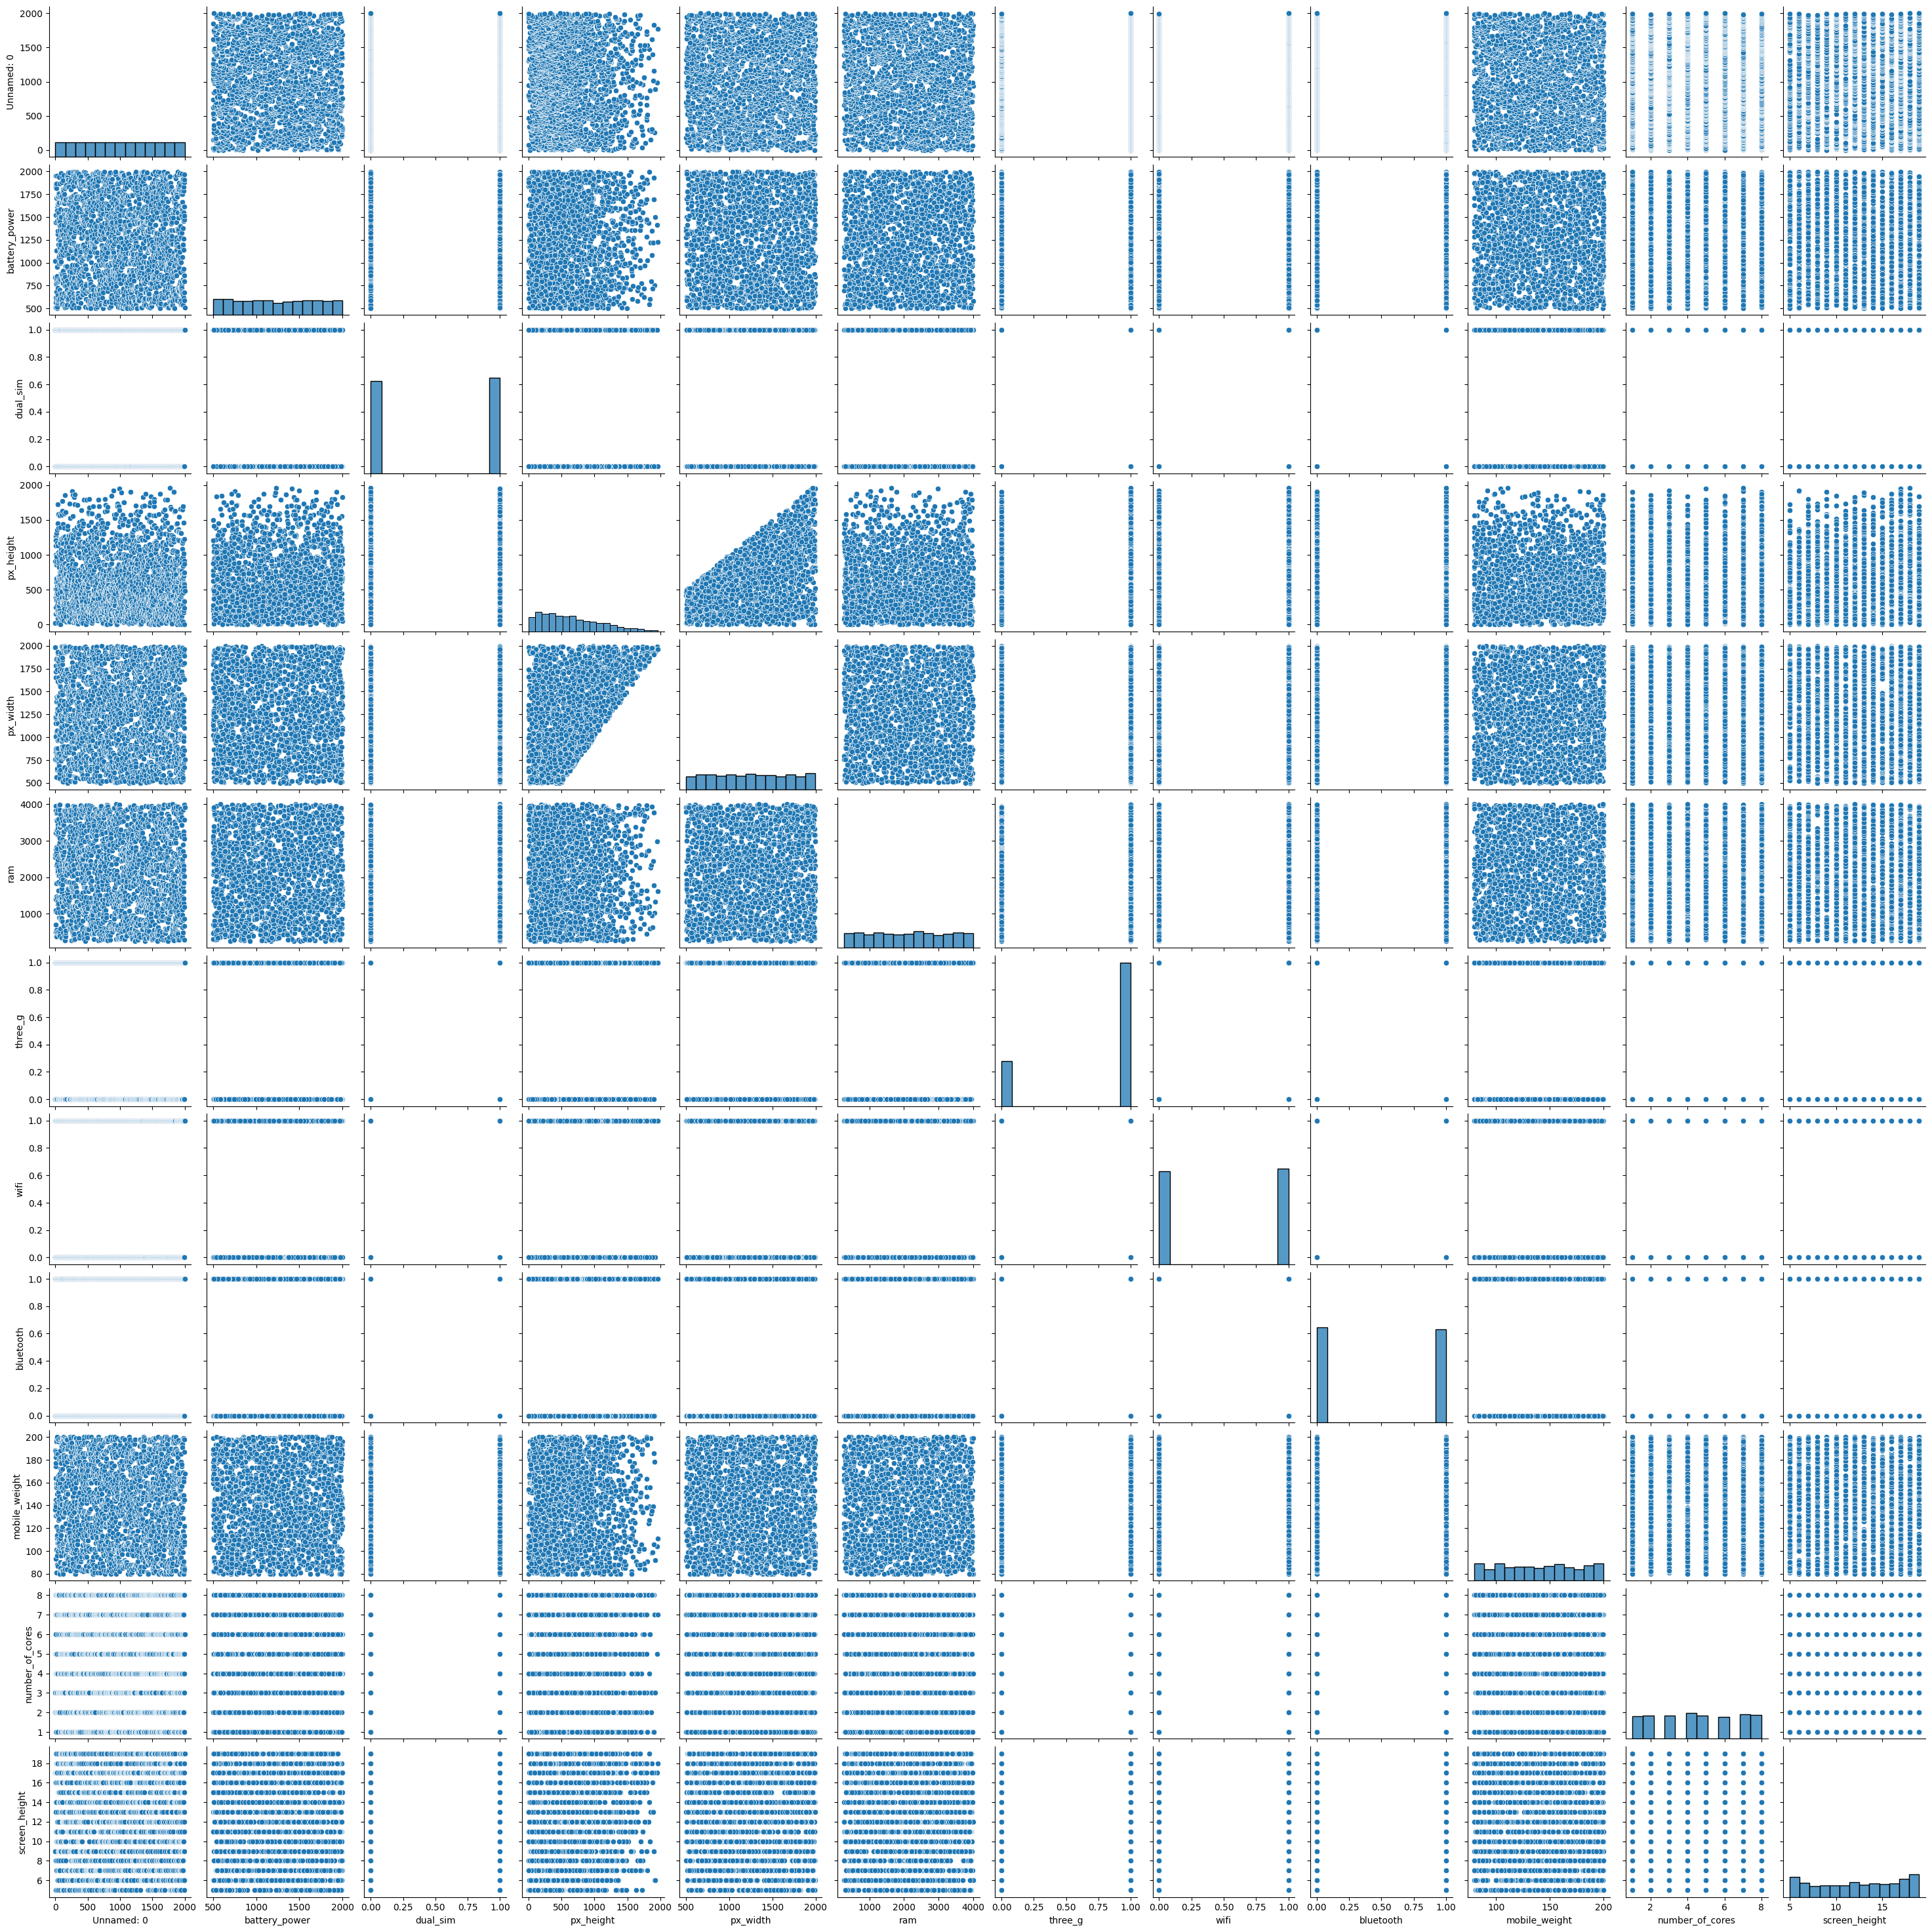

In [ ]:
df[numeric_cols].skew().sort_values()


sns.pairplot(df[numeric_cols])
plt.show()

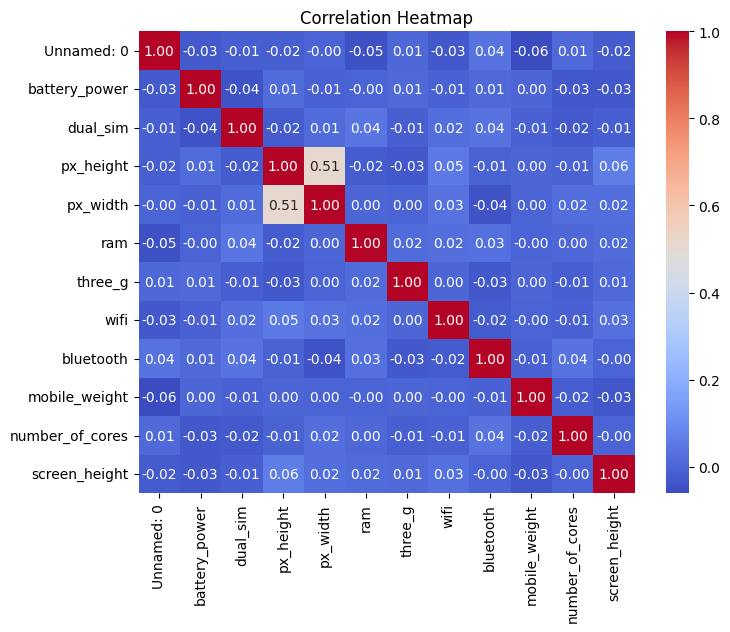

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df['four_g'] = pd.to_numeric(df['four_g'], errors='coerce')
median_four_g = df['four_g'].median()
df['four_g'] = df['four_g'].fillna(median_four_g)

In [ ]:
df['clock_speed'] = pd.to_numeric(df['clock_speed'], errors='coerce')
median_clock_speed = df['clock_speed'].median()
df['clock_speed'] = df['clock_speed'].fillna(median_clock_speed)

In [ ]:
df['talk_time'] = pd.to_numeric(df['talk_time'], errors='coerce')
median_talk_time = df['talk_time'].median()
df['talk_time'] = df['talk_time'].fillna(median_talk_time)

In [ ]:
df['touch_screen'] = pd.to_numeric(df['touch_screen'], errors='coerce')
median_touch_screen = df['touch_screen'].median()
df['touch_screen'] = df['touch_screen'].fillna(median_touch_screen)

In [ ]:
df['price_range'] = pd.to_numeric(df['price_range'], errors='coerce')
median_price_range = df['price_range'].median()
df['price_range'] = df['price_range'].fillna(median_price_range)

In [ ]:
df['front_camera'] = pd.to_numeric(df['front_camera'], errors='coerce')
median_front_camera = df['front_camera'].median()
df['front_camera'] = df['front_camera'].fillna(median_front_camera)

In [ ]:
df['memory'] = pd.to_numeric(df['memory'], errors='coerce')
median_memory = df['memory'].median()
df['memory'] = df['memory'].fillna(median_memory)

In [ ]:
df['mobile_depth'] = pd.to_numeric(df['mobile_depth'], errors='coerce')
median_mobile_depth = df['mobile_depth'].median()
df['mobile_depth'] = df['mobile_depth'].fillna(median_mobile_depth)

In [ ]:
df['camera_pixels'] = pd.to_numeric(df['camera_pixels'], errors='coerce')
median_camera_pixels = df['camera_pixels'].median()
df['camera_pixels'] = df['camera_pixels'].fillna(median_camera_pixels)

In [ ]:
df['screen_width'] = pd.to_numeric(df['screen_width'], errors='coerce')
median_screen_width = df['screen_width'].median()
df['screen_width'] = df['screen_width'].fillna(median_screen_width)


In [ ]:
df.isna().sum()

Unnamed: 0           0
battery_power        0
clock_speed        108
dual_sim             0
four_g             110
px_height            0
px_width             0
ram                  0
talk_time          107
three_g              0
touch_screen       110
wifi                 0
price_range        108
bluetooth            0
front_camera       108
memory             105
mobile_depth       109
mobile_weight        0
number_of_cores      0
camera_pixels      102
screen_height        0
screen_width       106
dtype: int64

 NUMERICAL VARIABLES ANALYSIS


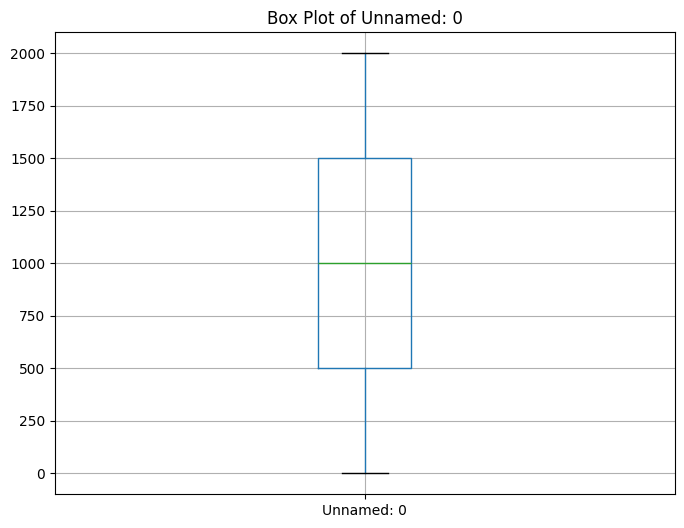

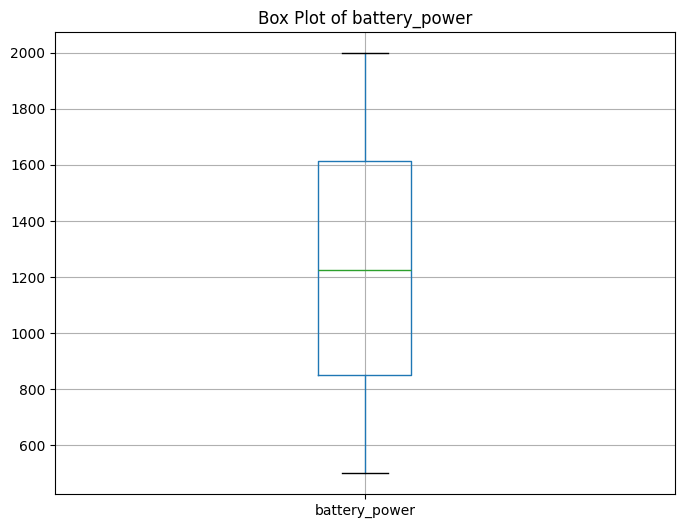

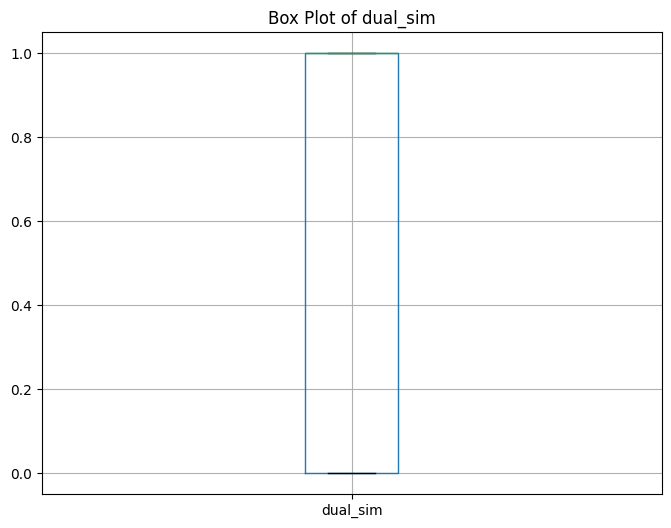

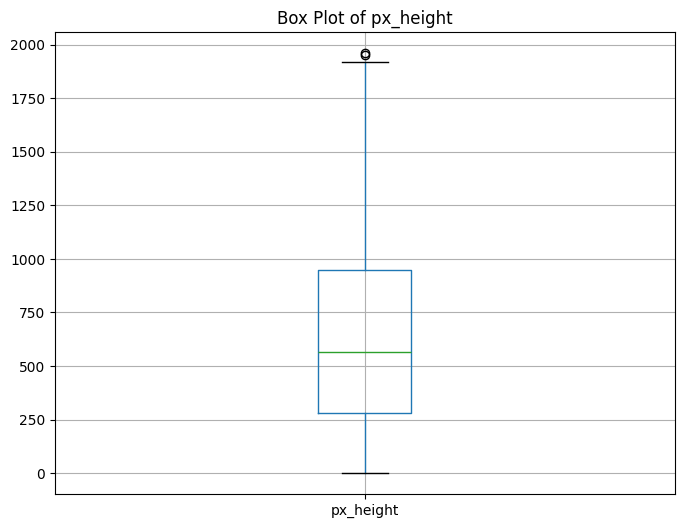

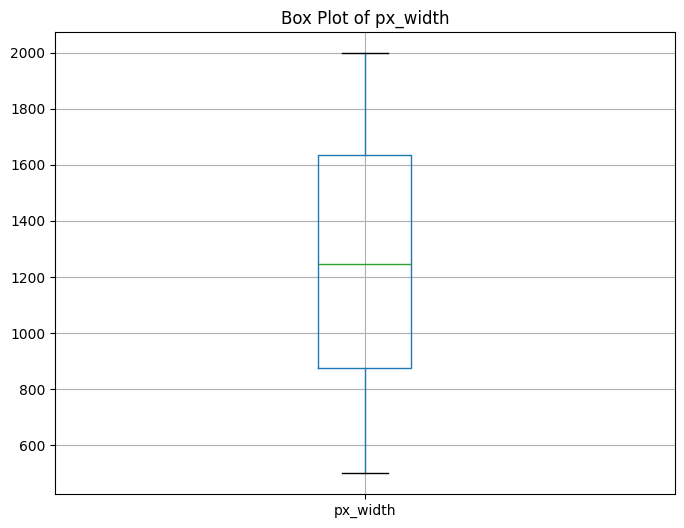

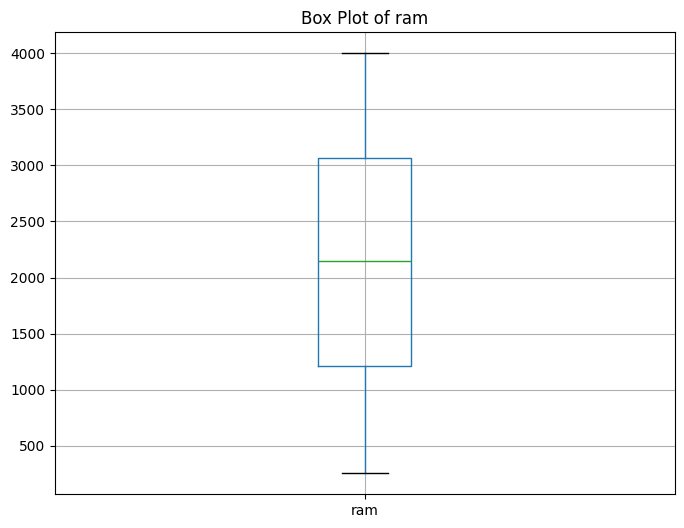

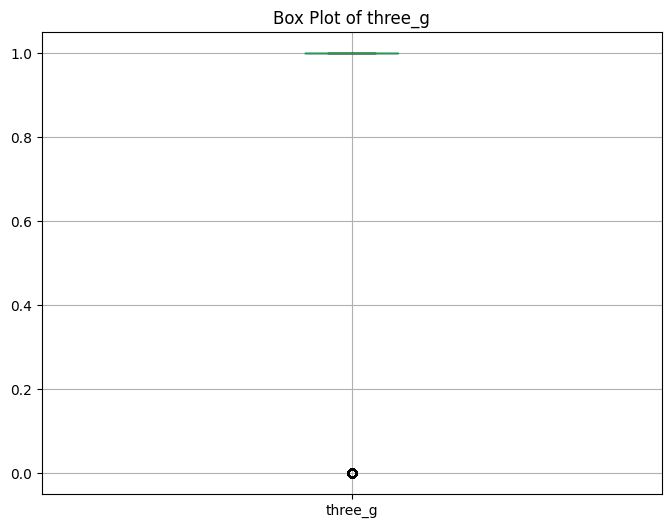

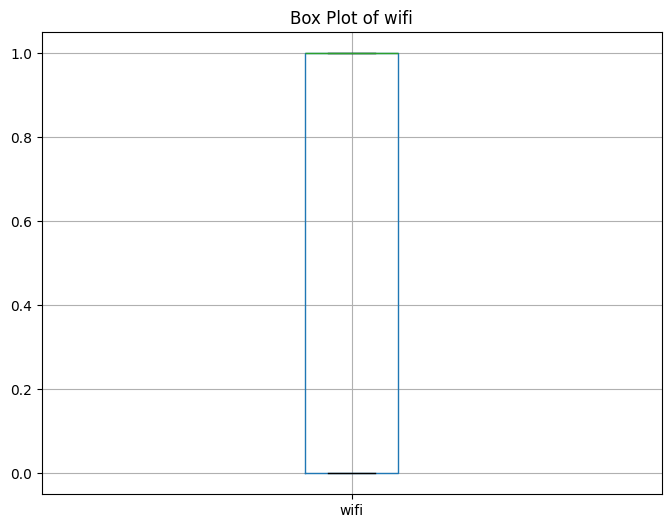

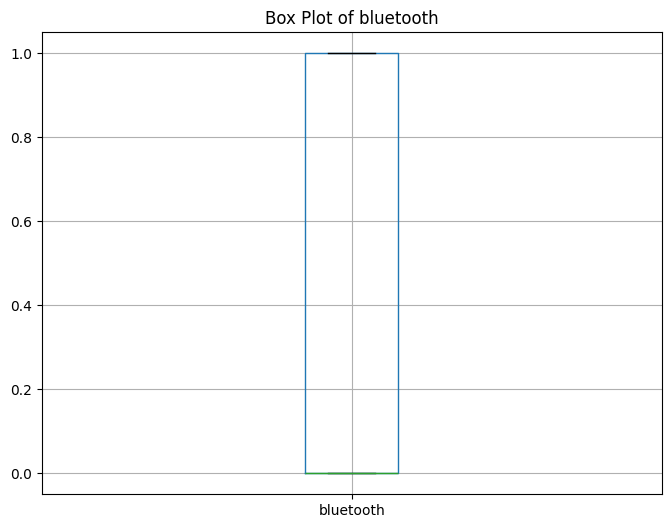

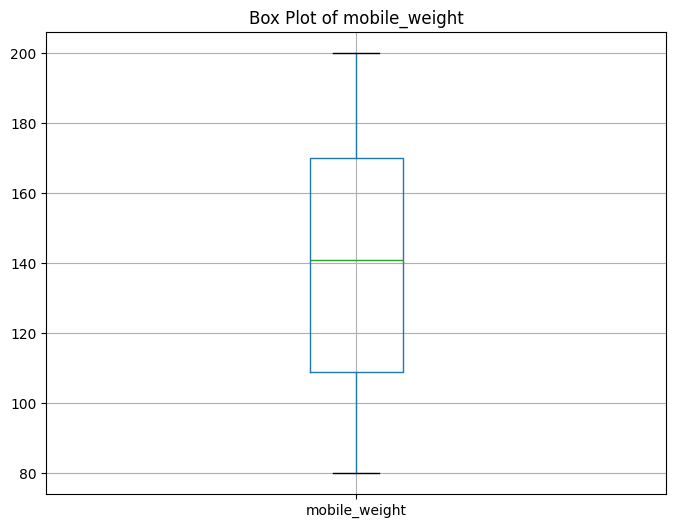

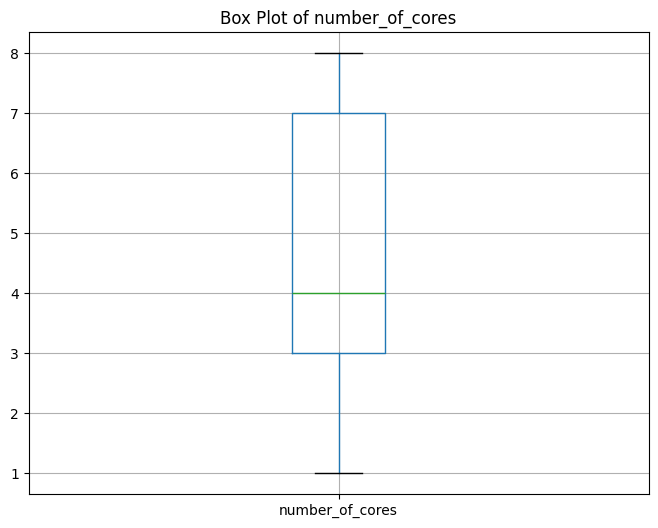

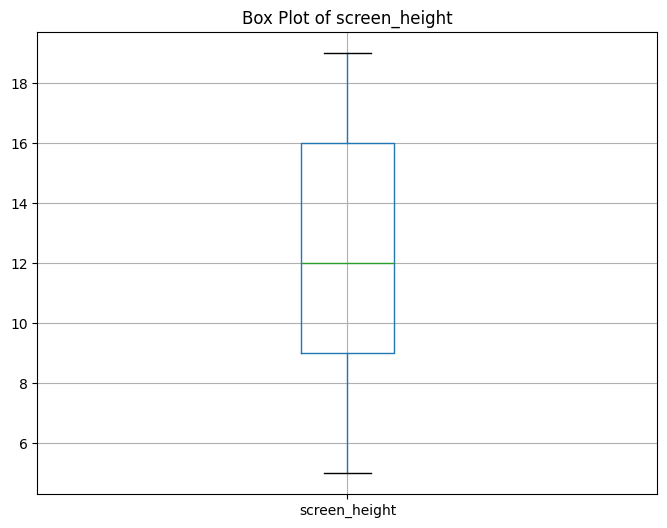


 OUTLIER DETECTION (IQR Method):
------------------------------
Unnamed: 0: 0 outliers (0.00%)
battery_power: 0 outliers (0.00%)
dual_sim: 0 outliers (0.00%)
px_height: 2 outliers (0.10%)
px_width: 0 outliers (0.00%)
ram: 0 outliers (0.00%)
three_g: 477 outliers (23.85%)
wifi: 0 outliers (0.00%)
bluetooth: 0 outliers (0.00%)
mobile_weight: 0 outliers (0.00%)
number_of_cores: 0 outliers (0.00%)
screen_height: 0 outliers (0.00%)


In [ ]:
print(" NUMERICAL VARIABLES ANALYSIS")
print("=" * 50)

numeric_columns = df.select_dtypes(include=['int64']).columns
df_numeric = df.copy()

for col in numeric_columns:
  plt.figure(figsize=(8, 6))
  df_numeric.boxplot(column=col)
  plt.title(f'Box Plot of {col}')
  plt.show()


print("\n OUTLIER DETECTION (IQR Method):")
print("-" * 30)
for col in numeric_columns:
    Q1 = df_numeric[col].quantile(0.25)
    Q3 = df_numeric[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_numeric[(df_numeric[col] < lower_bound) | (df_numeric[col] > upper_bound)][col]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df_numeric)*100:.2f}%)")

In [ ]:
df['three_g'] = df['three_g']

              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92       219
         1.0       0.87      0.95      0.91       181

    accuracy                           0.91       400
   macro avg       0.91      0.92      0.91       400
weighted avg       0.92      0.91      0.91       400

AUC Score: 0.915777390953354


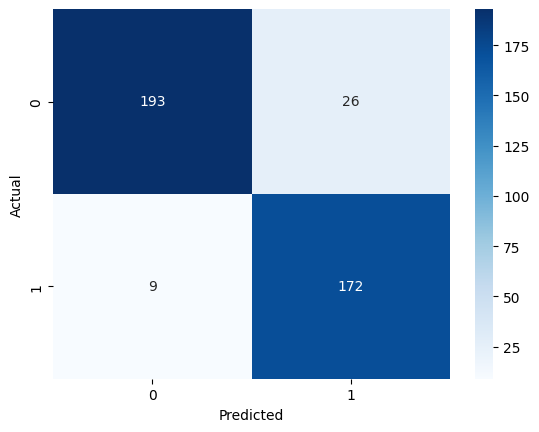

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score

x = df.drop('price_range', axis=1)
y = df['price_range']

categorical_cols = x.select_dtypes(include='object').columns
x = pd.get_dummies(x, columns=categorical_cols, drop_first=True)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print(classification_report(y_test, y_pred))

auc_score = roc_auc_score(y_test, y_pred)
print(f"AUC Score: {auc_score}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91       219
         1.0       0.87      0.92      0.89       181

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400

AUC Score: 0.901485910340826


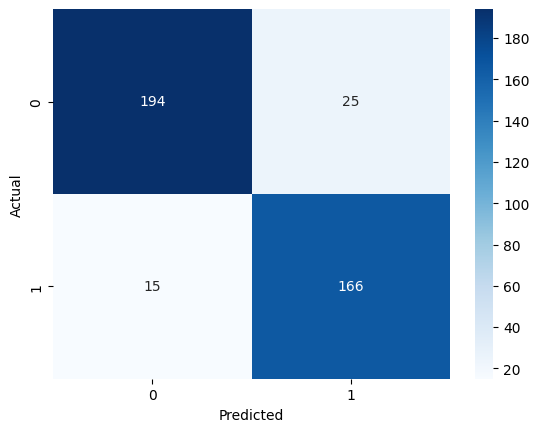

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
x = df.drop('price_range', axis=1)
y = df['price_range']

categorical_cols = x.select_dtypes(include='object').columns
x = pd.get_dummies(x, columns=categorical_cols, drop_first=True)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lg = LogisticRegression(solver='liblinear', random_state=42)
lg.fit(x_train, y_train)
y_pred = lg.predict(x_test)
print(classification_report(y_test, y_pred))
auc_score = roc_auc_score(y_test, y_pred)
print(f"AUC Score: {auc_score}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

              precision    recall  f1-score   support

         0.0       0.96      0.89      0.92       219
         1.0       0.87      0.96      0.91       181

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400

AUC Score: 0.9208229269154117


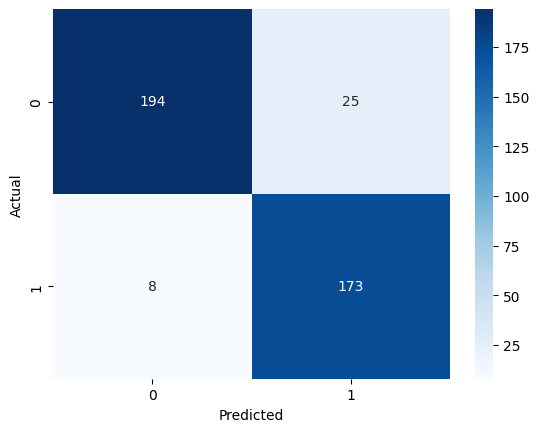

In [ ]:
from xgboost import XGBClassifier

x = df.drop('price_range', axis=1)
y = df['price_range']


categorical_cols = x.select_dtypes(include='object').columns
x = pd.get_dummies(x, columns=categorical_cols, drop_first=True)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

XG = XGBClassifier(random_state=42)

XG.fit(x_train, y_train)
y_pred = XG.predict(x_test)
print(classification_report(y_test, y_pred))

auc_score = roc_auc_score(y_test, y_pred)
print(f"AUC Score: {auc_score}")


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

❌ The best model

❌ Not cleared Unnamed: 0

❌ Convert all numeric columns that became objects back to numeric.

❌ Handle missing values by replacing NaN with the mean, median, or mode depending on the column type.

❌ Visualize relationships such as RAM vs price_range and battery_power vs price_range.
